In [1]:
from __future__ import division
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline
import random

Deep Learning
1. Gradient Decent
2. Backproping

### Question 1

1. Draw a network with:
• 2 inputs
• 1 hidden layers with 3 hidden units and a
• 1-class output (for binary classification)

https://github.com/JingrongT/Neural-Network-and-Deep-Learning/blob/master/ANN_DL_HW2.jpg

2. Write out the mathematical equation for the output of this network (feel free to break the input-output relationship into multiple equations).

$h_1=max(0,w_11x_1+w_21x_2+b_1)$
$h_2=max(0,w_12x_1+w_22x_2+b_2)$
$h_3=max(0,w_13x_1+w_23x_2+b_3)$
$y=\sigma(v_1h_1+v_2h_2+v_3h_3+b_4)$

3. Write out the forward-pass function in python, call it ff nn ReLu(...)

4. what are the class probabilities associated with the forward pass of each sample?

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

#######################
#   Helper functions  #
#######################
# Linear activation
def a(x,w,b):
    a_out = x.dot(w) + b
    return a_out

# Sigmoid function
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

def ReLU(z):
    return np.maximum(0,z)

def feedforward_ReLU(x, w, v, b_1, b_2):
    '''
    A simple 2 layer neural network with sigmoid activation and binary output.
    '''
    h = ReLU(np.dot(x,w) + b_1)
    y = sigmoid(np.dot(h,v) + b_2)

    return np.array(y)

# Layer 1
b_1 = np.array([0,0,1])
# Layer 2
b_2 = 1

# Restructing for ease of implementation
w_1 = np.array([1,-1,0])
w_2 = np.array([0,0,0.5])

w = np.array([w_1,w_2])
v = np.array([1,0,-1])

x=[[1,-1],[0,-1],[0,1]]
feedforward_ReLU(x, w, v, b_1, b_2)

array([0.81757448, 0.62245933, 0.37754067])

### Question 2

$f(x, y) = (1 − x^3) + 100 ∗ (y^2 − x)^2$

1. the partial derivatives of f with respect to x and to y

$\partial f/\partial y = 200*2*y*(y**2-x)$

$\partial f/\partial x = -3*x^2+200*(y^2-x) $

2. Create a visualization of the contours of the Rosenbrock function.

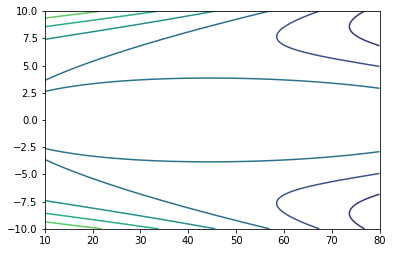

In [2]:
delta = 0.025
x = np.arange(10.0, 80.0, delta)
y = np.arange(-10.0, 10.0, delta)
X, Y = np.meshgrid(x, y)
Z = (1-X**3)  +  100*(Y**2-X)**2
fig, ax = plt.subplots()

CS = ax.contour(X, Y, Z)

3. Write a Gradient Descent algorithm for finding the minimum of the function. Visualize your results with a few different learning rates.

In [3]:
def grad_f(vector):
    x, y = vector
    df_dx = -3*(x**2)+200*(y**2)-200*x 
    df_dy = 200*2*y*(y**2-x)
    return np.array([df_dx, df_dy])

In [4]:
def grad_descent(starting_point=None, iterations=10, learning_rate=12):
    #point2 = np.random.uniform(-10,10)
    #point1 = np.random.uniform(-10,10)
    #point = np.asarray([point1,point2])
    #trajectory = [point]
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-10,10,size=2)
    trajectory = [point]
    
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate * grad
        trajectory.append(point)
    return np.array(trajectory)

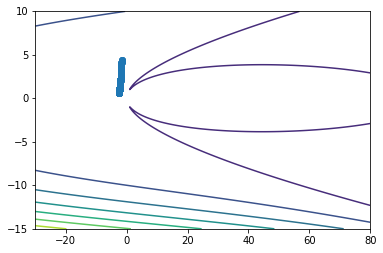

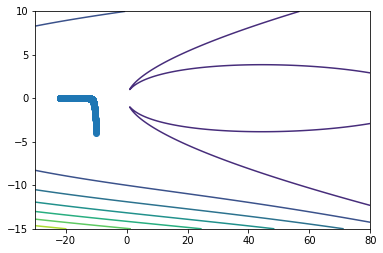

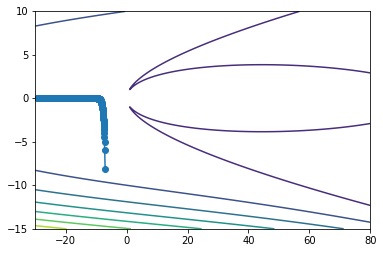

In [5]:
np.random.seed(1)
for i in [0.000001,0.000005,0.000009]:    
    traj = grad_descent(iterations=1000, learning_rate=i)
    x = np.arange(-30.0, 80.0, delta)
    y = np.arange(-15.0, 10.0, delta)
    X, Y = np.meshgrid(x, y)
    Z = (1-X**3)  +  100*(Y**2-X)**2
    fig, ax = plt.subplots()
    CS = ax.contour(X, Y, Z)
    x= traj[:,0]
    y= traj[:,1]
    plt.plot(x,y,'-o')

4. Write a Gradient Descent With Momentum algorithm for finding the minimum. Visualize your results with a few different settings of the algorithm’s hyperparameters.

In [6]:
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-10,10,size=2)
    trajectory = [point]
    v = np.zeros(point.size)
    
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
    return np.array(trajectory)

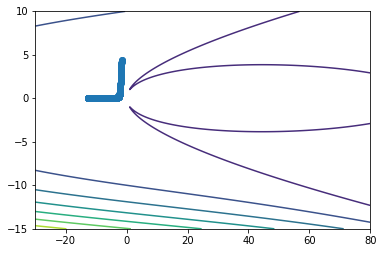

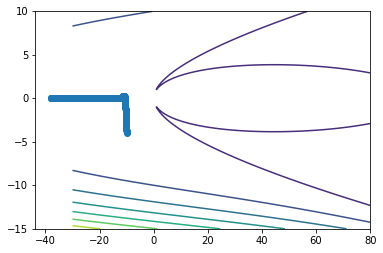

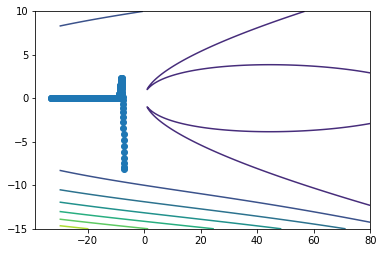

In [7]:
np.random.seed(1)
for i in [0.000001,0.000005,0.000009]:    
    traj = grad_descent_with_momentum(iterations=1000, alpha=.9, epsilon=0.000001)
    x = np.arange(-30.0, 80.0, delta)
    y = np.arange(-15.0, 10.0, delta)
    X, Y = np.meshgrid(x, y)
    Z = (1-X**3)  +  100*(Y**2-X)**2
    fig, ax = plt.subplots()
    CS = ax.contour(X, Y, Z)
    x= traj[:,0]
    y= traj[:,1]
    plt.plot(x,y,'-o')

## Backprop

1. For the same network as in Question 1, derive expressions of the gradient of the Loss function with respect to each of the model parameters.

$\frac{\partial L}{\partial w_{ij}} =\frac{\partial L}{\partial \hat{y}} *\frac{\partial \hat{y}}{\partial w_{ij}}$

$\frac{\partial L}{\partial \hat{y}} = \frac{y}{\hat{y}}-\frac{1-y}{1-\hat{y}}$

$\frac{\hat{y}}{\partial w_{11}} = 0 $ if $w_{11} x_1 +w_{12} x_2 + b_1 \leq 0$

$\frac{\hat{y}}{\partial w_{11}} = x_1 $ if $w_{11} x_1 +w_{12} x_2 + b_1 > 0$

$\frac{\hat{y}}{\partial w_{12}} = 0 $ if $w_{11} x_1 +w_{12} x_2 + b_1 \leq 0$

$\frac{\hat{y}}{\partial w_{12}} = x_2 $ if $w_{11} x_1 +w_{12} x_2 + b_1 > 0$

$\frac{\hat{y}}{\partial w_{21}} = 0 $ if $w_{21} x_1 +w_{22} x_2 + b_2 \leq 0$

$\frac{\hat{y}}{\partial w_{21}} = x_1 $ if $w_{21} x_1 +w_{22} x_2 + b_2 > 0$

$\frac{\hat{y}}{\partial w_{22}} = 0 $ if $w_{21}x_1 +w_{22} x_2 + b_2 \leq 0$

$\frac{\hat{y}}{\partial w_{22}} = x_2 $ if $w_{21} x_1 +w_{22} x_2 + b_2 > 0$

$\frac{\hat{y}}{\partial w_{13}} = 0 $ if $w_{31} x_1 +w_{32} x_2 + b_3 \leq 0$

$\frac{\hat{y}}{\partial w_{13}} = x_1 $ if $w_{31} x_1 +w_{32} x_2 + b_3 > 0$

$\frac{\hat{y}}{\partial w_{23}} = 0 $ if $w_{31} x_1 +w_{32} x_2 + b_3 \leq 0$

$\frac{\hat{y}}{\partial w_{23}} = x_2 $ if $w_{31} x_1 +w_{32} x_2 + b_3 > 0$

$\frac{\hat{L}}{\partial c} = \frac{\partial L}{\partial \hat{y}}*\frac{\hat{y}}{\partial c} =( \frac{y}{\hat{y}}-\frac{1-y}{1-\hat{y}})$

2. Write a function grad f(...) that takes in a weights vector and returns the gradient of the Loss at that location.

In [2]:
def loss(y, y_hat):
    return np.average(-y*np.log(y_hat)-(1-y)*np.log(1-y_hat))

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def ReLU(x):
    return np.maximum(0,x)

def ReLU_derivative(x):
    arr = []
    for i in x:
        if i>0:
            arr.append(1)
        else:
            arr.append(0)
    return arr

def yhat(x,y, coeffs):
    # returns model prediction 
    w11, w12, w13, w21,w22,w23,v1,v2,v3,b = coeffs
    x = np.transpose(x)
    h1 = ReLU(x[0]*w11+x[1]*w21)
    h2 = ReLU(x[0]*w12+x[1]*w22)
    h3 = ReLU(x[0]*w13+x[1]*w23)
    y_hat = sigmoid(v1*h1+v2*h2+v3*h3+b)
    return y_hat

In [3]:
def grad_f(vector, x, y):
    """
    Computes local gradient vector for squared-error loss on OLS regression model cofficients
    """
    w11, w12, w13, w21,w22,w23,v1,v2,v3,b = vector
    prediction = yhat(x, y, vector) 
    residuals = (y - prediction)
     
    x = np.transpose(x)
    
    dL_dw11 = -np.average(residuals*v1*x[0]*ReLU_derivative(w11*x[0]+w21*x[1]))
    dL_dw12 = -np.average(residuals*v2*x[0]*ReLU_derivative(w12*x[0]+w22*x[1]))
    dL_dw13 = -np.average(residuals*v3*x[0]*ReLU_derivative(w13*x[0]+w23*x[1]))

    dL_dw21 = -np.average(residuals*v1*x[0]*ReLU_derivative(w11*x[0]+w21*x[1]))
    dL_dw22 = -np.average(residuals*v2*x[0]*ReLU_derivative(w12*x[0]+w22*x[1]))
    dL_dw23 = -np.average(residuals*v3*x[0]*ReLU_derivative(w13*x[0]+w23*x[1]))

    dL_dv1 = -np.average(residuals*ReLU(w11*x[0]+w21*x[1]))
    dL_dv2 = -np.average(residuals*ReLU(w12*x[0]+w22*x[1]))
    dL_dv3 = -np.average(residuals*ReLU(w13*x[0]+w23*x[1]))
    
    dL_db = - np.average(residuals)

    
    return np.array([dL_dw11, dL_dw12, dL_dw13, dL_dw21, dL_dw22,dL_dw23,dL_dv1,dL_dv2,dL_dv3,dL_db])

3. Generate a synthetic dataset like the XOR pattern (see below).

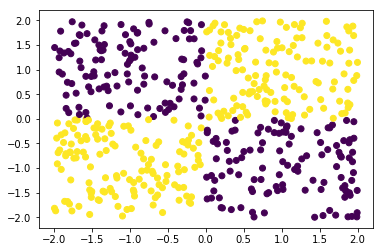

In [4]:
x = np.random.uniform(low=-2,high=2,size=1000).reshape((500,2))
y=np.zeros(500)
y[np.logical_and(x[:,0]>0 , x[:,1]>0)]=1
y[np.logical_and(x[:,0]<0 , x[:,1]<0)]=1
plt.scatter(x[:,0],x[:,1],c=y)


4. Fit your network using Gradient Descent. Keep track of the total Loss at each iteration and plot the result.

In [5]:
def grad_descent(x, y, starting_point=None, iterations=1000, learning_rate=1e-4):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-2,2,size=10).astype("float128")
    trajectory = [point]
    losses = [loss(y, yhat(x,y,point))]
    
    for i in range(iterations):
        grad = grad_f(point, x, y)
        point = point - learning_rate * grad
        trajectory.append(point)
        #print(grad)
        losses.append(loss(y, yhat(x,y,point)))
    return (np.array(trajectory), losses)

In [6]:
traj, losses = grad_descent(x, y, iterations=500,learning_rate=1e-2)

Text(0.5, 0, 'Iteration')

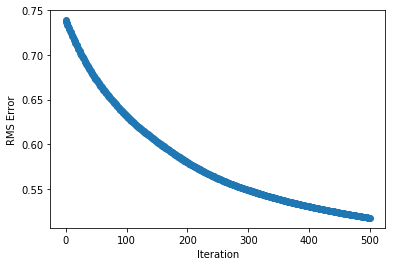

In [7]:
plt.plot(losses,'o')
plt.ylabel("RMS Error")
plt.xlabel("Iteration")

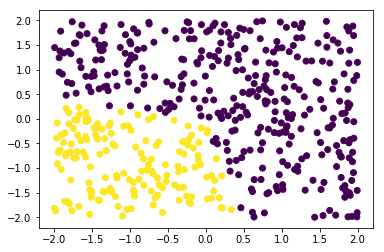

In [8]:
plt.scatter(x[:,0],x[:,1],c = yhat(x,y,traj[500])>0.5)

5. Repeat the exercise above using Momentum. Comment on whether your algorithm seems to converge more efficiently.

In [32]:
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=1e-1):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-2,2,size=10).astype("float128")
    trajectory = [point]
    losses = [loss(y, yhat(x,y,point))]
    v = np.zeros(point.size)
    for i in range(iterations):
        grad = grad_f(point, x, y)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
        losses.append(loss(y, yhat(x,y,point)))
    return (np.array(trajectory), losses)

In [38]:
traj, losses= grad_descent_with_momentum(starting_point=None, iterations=500, alpha=.9, epsilon=1e-2)

Text(0.5, 0, 'Iteration')

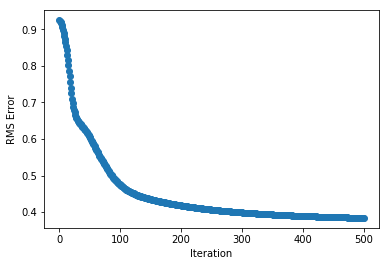

In [39]:
plt.plot(losses,'o')
plt.ylabel("RMS Error")
plt.xlabel("Iteration")

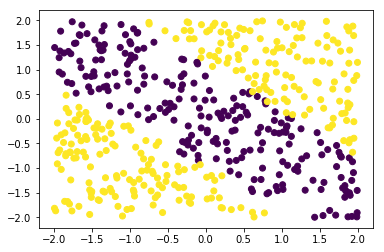

In [40]:
plt.scatter(x[:,0],x[:,1],c = yhat(x,y,traj[-1])>0.5)

6. Plot a visualization of the final decision boundary that your model has learned. Overlay the datapoints in this plot.

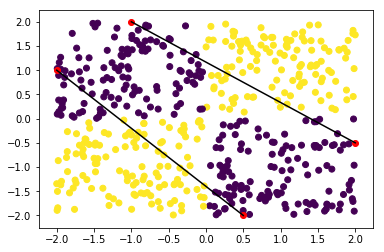

In [53]:

import matplotlib.pyplot as plt
x = np.random.uniform(low=-2,high=2,size=1000).reshape((500,2))
y=np.zeros(500)
y[np.logical_and(x[:,0]>0 , x[:,1]>0)]=1
y[np.logical_and(x[:,0]<0 , x[:,1]<0)]=1


xx=[-2 ,0.5 ,-1,2]
yy=[1, -2, 2,-0.5]

plt.plot(xx,yy, 'ro')

def connectpoints(x,y,p1,p2):
    x1, x2 = x[p1], x[p2]
    y1, y2 = y[p1], y[p2]
    plt.plot([x1,x2],[y1,y2],'k-')

connectpoints(xx,yy,0,1)
connectpoints(xx,yy,2,3)

plt.scatter(x[:,0],x[:,1],c=y)

plt.show()